In [109]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

from utility import utilities

In [110]:
df = pd.read_table('Hippo_2.txt')
df.set_index('Fasta headers',inplace=True)
#rename columns
df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null']
#print (df.reset_index(drop=True).head())

#remove all zeros rows
print ('before', df.shape)
df = df[(df.T != 0).any()]
print ('after', df.shape)

norm = utilities.quantileNormalize(df)

before (8304, 10)
after (7478, 10)


In [121]:
df['FN1']=df['HF_1']/df['ND_1']
df['FN2']=df['HF_2']/df['ND_1']
df['FN3']=df['HF_3']/df['ND_1']
df['FN4']=df['HF_1']/df['ND_2']
df['FN5']=df['HF_2']/df['ND_2']
df['FN6']=df['HF_3']/df['ND_2']
df['FN7']=df['HF_1']/df['ND_3']
df['FN8']=df['HF_2']/df['ND_3']
df['FN9']=df['HF_3']/df['ND_3']
df['KN1']=df['KO_1']/df['ND_1']
df['KN2']=df['KO_2']/df['ND_1']
df['KN3']=df['KO_3']/df['ND_1']
df['KN4']=df['KO_1']/df['ND_2']
df['KN5']=df['KO_2']/df['ND_2']
df['KN6']=df['KO_3']/df['ND_2']
df['KN7']=df['KO_1']/df['ND_3']
df['KN8']=df['KO_2']/df['ND_3']
df['KN9']=df['KO_3']/df['ND_3']

/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


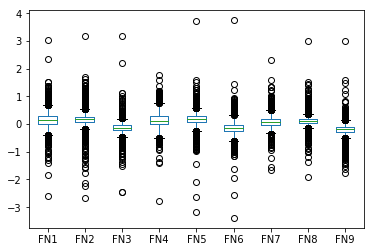

In [112]:
temp = df[['FN1','FN2','FN3','FN4','FN5','FN6','FN7','FN8','FN9']]
np.log2(temp).plot(kind='box')

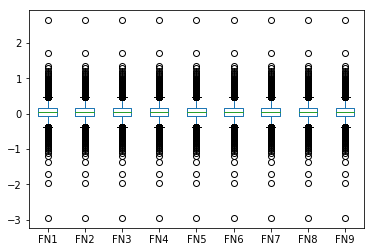

In [113]:
np.log2(utilities.quantileNormalize(temp)).plot(kind='box')

In [115]:
norm = np.log2(utilities.quantileNormalize(temp))
pvals=[]
tvals=[]
for item in norm.index.values:
    a = norm.loc[item].values
    b = np.zeros(a.shape[0])
    onesample_results = ttest_ind(a,b)
    pvals.append(onesample_results[1])
    tvals.append(onesample_results[0])

/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [116]:
norm['T_test']=tvals
norm['PVAL']=pvals
#norm['log2FC']=np.log2(norm.iloc[:,0:3].median(axis=1)/norm.iloc[:,3:6].median(axis=1))
#norm['log2FC']=np.exp(norm.iloc[:,0:3].median(axis=1)+norm.iloc[:,3:6].median(axis=1))
norm.loc['sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1 PE=1 SV=2;sp|Q9Z2H5-2|E41L1_MOUSE Isoform 2 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1;sp|Q9Z2H5-3|E41L1_MOUSE Isoform 3 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41']

FN1       0.128311
FN2       0.207256
FN3       0.508070
FN4       0.118456
FN5       0.186184
FN6       0.421942
FN7       0.165090
FN8       0.280710
FN9       0.511957
T_test    5.298210
PVAL      0.000072
Name: sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1 PE=1 SV=2;sp|Q9Z2H5-2|E41L1_MOUSE Isoform 2 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1;sp|Q9Z2H5-3|E41L1_MOUSE Isoform 3 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41, dtype: float64

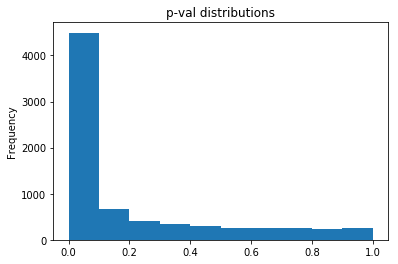

In [117]:
norm['PVAL'].plot(kind='hist',bins=10)
plt.title('p-val distributions')
plt.show()

In [118]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(norm['PVAL'], method='bonferroni')
norm['PVAL_ADJ']=p_adjusted[1]
norm['mean']=p_adjusted[1]

/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [120]:
norm['mean'] = norm[['FN1','FN2','FN3','FN4','FN5','FN6','FN7','FN8','FN9']].mean(axis=1)
selection = norm[(norm['PVAL_ADJ']<0.05)& ( (norm['mean']>0.27)| (norm['mean']<-0.27))].sort_values(by='mean',ascending=True).head()
print (selection.shape)
print (selection.head())


(5, 13)
                                                         FN1       FN2  \
Fasta headers                                                            
tr|G5E846|G5E846_MOUSE Peripherin OS=Mus muscul... -0.365406 -0.429904   
tr|Q3U699|Q3U699_MOUSE Putative uncharacterized... -0.274794 -0.294672   
sp|O35685|NUDC_MOUSE Nuclear migration protein ...  0.366012  0.210879   
sp|Q6PGL7|WASC2_MOUSE WASH complex subunit 2 OS...  0.422445  0.358502   
tr|Q6PDS2|Q6PDS2_MOUSE Ubr7 protein (Fragment) ...  0.284828  0.335843   

                                                         FN3       FN4  \
Fasta headers                                                            
tr|G5E846|G5E846_MOUSE Peripherin OS=Mus muscul... -0.465071 -0.461464   
tr|Q3U699|Q3U699_MOUSE Putative uncharacterized... -0.417865 -0.536375   
sp|O35685|NUDC_MOUSE Nuclear migration protein ...  0.277509  0.391976   
sp|Q6PGL7|WASC2_MOUSE WASH complex subunit 2 OS...  0.295577  0.323346   
tr|Q6PDS2|Q6PDS2_MOUSE Ubr7 p

In [100]:
np.log2(1.2)

0.26303440583379378

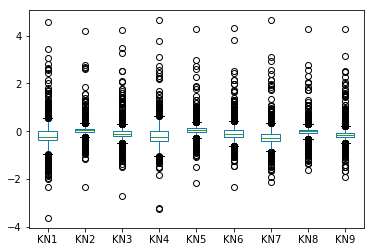

In [122]:
temp = df[['KN1','KN2','KN3','KN4','KN5','KN6','KN7','KN8','KN9']]
np.log2(temp).plot(kind='box')

In [123]:
norm = np.log2(utilities.quantileNormalize(temp))
pvals=[]
tvals=[]
for item in norm.index.values:
    a = norm.loc[item].values
    b = np.zeros(a.shape[0])
    onesample_results = ttest_ind(a,b)
    pvals.append(onesample_results[1])
    tvals.append(onesample_results[0])

/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [125]:
norm['T_test']=tvals
norm['PVAL']=pvals

from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(norm['PVAL'], method='bonferroni')
norm['PVAL_ADJ']=p_adjusted[1]
norm['mean']=p_adjusted[1]

/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


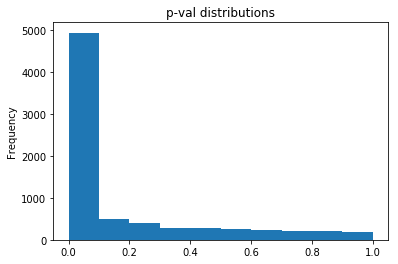

In [126]:
norm['PVAL'].plot(kind='hist',bins=10)
plt.title('p-val distributions')
plt.show()

In [127]:
norm['mean'] = norm[['KN1','KN2','KN3','KN4','KN5','KN6','KN7','KN8','KN9']].mean(axis=1)
selection = norm[(norm['PVAL_ADJ']<0.05)& ( (norm['mean']>0.27)| (norm['mean']<-0.27))].sort_values(by='mean',ascending=True).head()
print (selection.shape)
print (selection.head())


(5, 13)
                                                         KN1       KN2  \
Fasta headers                                                            
sp|Q8BWU8|AT2L1_MOUSE Ethanolamine-phosphate ph... -0.957945 -0.773625   
tr|A0A0M4KM70|A0A0M4KM70_MOUSE Monoclonal 11D8 ... -0.730979 -1.485591   
tr|Q65ZC0|Q65ZC0_MOUSE Kappa light chain C_regi... -0.494483 -1.284931   
tr|Q58E56|Q58E56_MOUSE Igh protein OS=Mus muscu... -0.572179 -1.130794   
tr|Q8C7R1|Q8C7R1_MOUSE Putative uncharacterized... -0.650840 -0.870501   

                                                         KN3       KN4  \
Fasta headers                                                            
sp|Q8BWU8|AT2L1_MOUSE Ethanolamine-phosphate ph... -1.229202 -1.316501   
tr|A0A0M4KM70|A0A0M4KM70_MOUSE Monoclonal 11D8 ... -1.130794 -0.831382   
tr|Q65ZC0|Q65ZC0_MOUSE Kappa light chain C_regi... -0.957945 -0.405119   
tr|Q58E56|Q58E56_MOUSE Igh protein OS=Mus muscu... -1.032450 -0.457281   
tr|Q8C7R1|Q8C7R1_MOUSE Putati

In [ ]:
Fasta headers                                                               
sp|Q8BWU8|AT2L1_MOUSE Ethanolamine-phosphate ph...  3.961056e-05 -1.175623  
tr|A0A0M4KM70|A0A0M4KM70_MOUSE Monoclonal 11D8 ...  1.837454e-05 -1.085007  
tr|Q65ZC0|Q65ZC0_MOUSE Kappa light chain C_regi...  9.299395e-04 -0.885479  
tr|Q58E56|Q58E56_MOUSE Igh protein OS=Mus muscu...  4.633688e-05 -0.882749  
tr|Q8C7R1|Q8C7R1_MOUSE Putative uncharacterized...  3.295256e-09 -0.869715 


tr|G5E846|G5E846_MOUSE Peripherin OS=Mus muscul...  6.727097e-08 -0.457096  
tr|Q3U699|Q3U699_MOUSE Putative uncharacterized...  4.166493e-06 -0.439755  
sp|O35685|NUDC_MOUSE Nuclear migration protein ...  1.208663e-03  0.270681  
sp|Q6PGL7|WASC2_MOUSE WASH complex subunit 2 OS...  1.496290e-02  0.271335  
tr|Q6PDS2|Q6PDS2_MOUSE Ubr7 protein (Fragment) ...  7.504332e-04  0.271617  

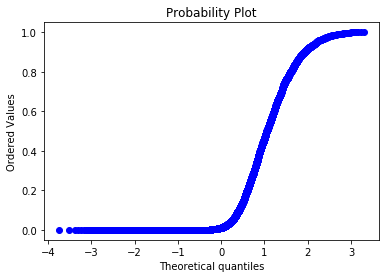

In [128]:
import pylab
import scipy.stats as stats
stats.probplot(norm['PVAL'], dist="norm", plot=pylab)
pylab.show()